<a href="https://colab.research.google.com/github/AmeyChavan-Org/Data_Mining/blob/main/Multi_attribute_Linear_regression_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CarPrice_regression  - CarPrice_regression .csv')
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Now, We'll try to make the data_frame Standaries in order to compute further things

In [ ]:
df=df.replace('gas',1)
df=df.replace('diesel',0)
df=df.replace('std',1)
df=df.replace('turbo',0)
df=df.replace('two',1)
df=df.replace('four',0)
df=df.replace('sedan',0)
df=df.replace('hatchback',1)
df=df.replace('convertible',2)
df=df.replace('wagon',3)
df=df.replace('hardtop',4)
df=df.replace('front',1)
df=df.replace('rear',0)
df=df.replace('4wd',0)
df=df.replace('rwd',1)
df=df.replace('fwd',2)


In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Now it is easy to compute co-relation

In [ ]:
corr = df.corr()
corr

<ipython-input-5-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


We will create a visualization model for above data_frme for simple understanding!

<ipython-input-6-7d051bf46edd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sp.heatmap(df.corr(),annot=True,cmap="YlGnBu")


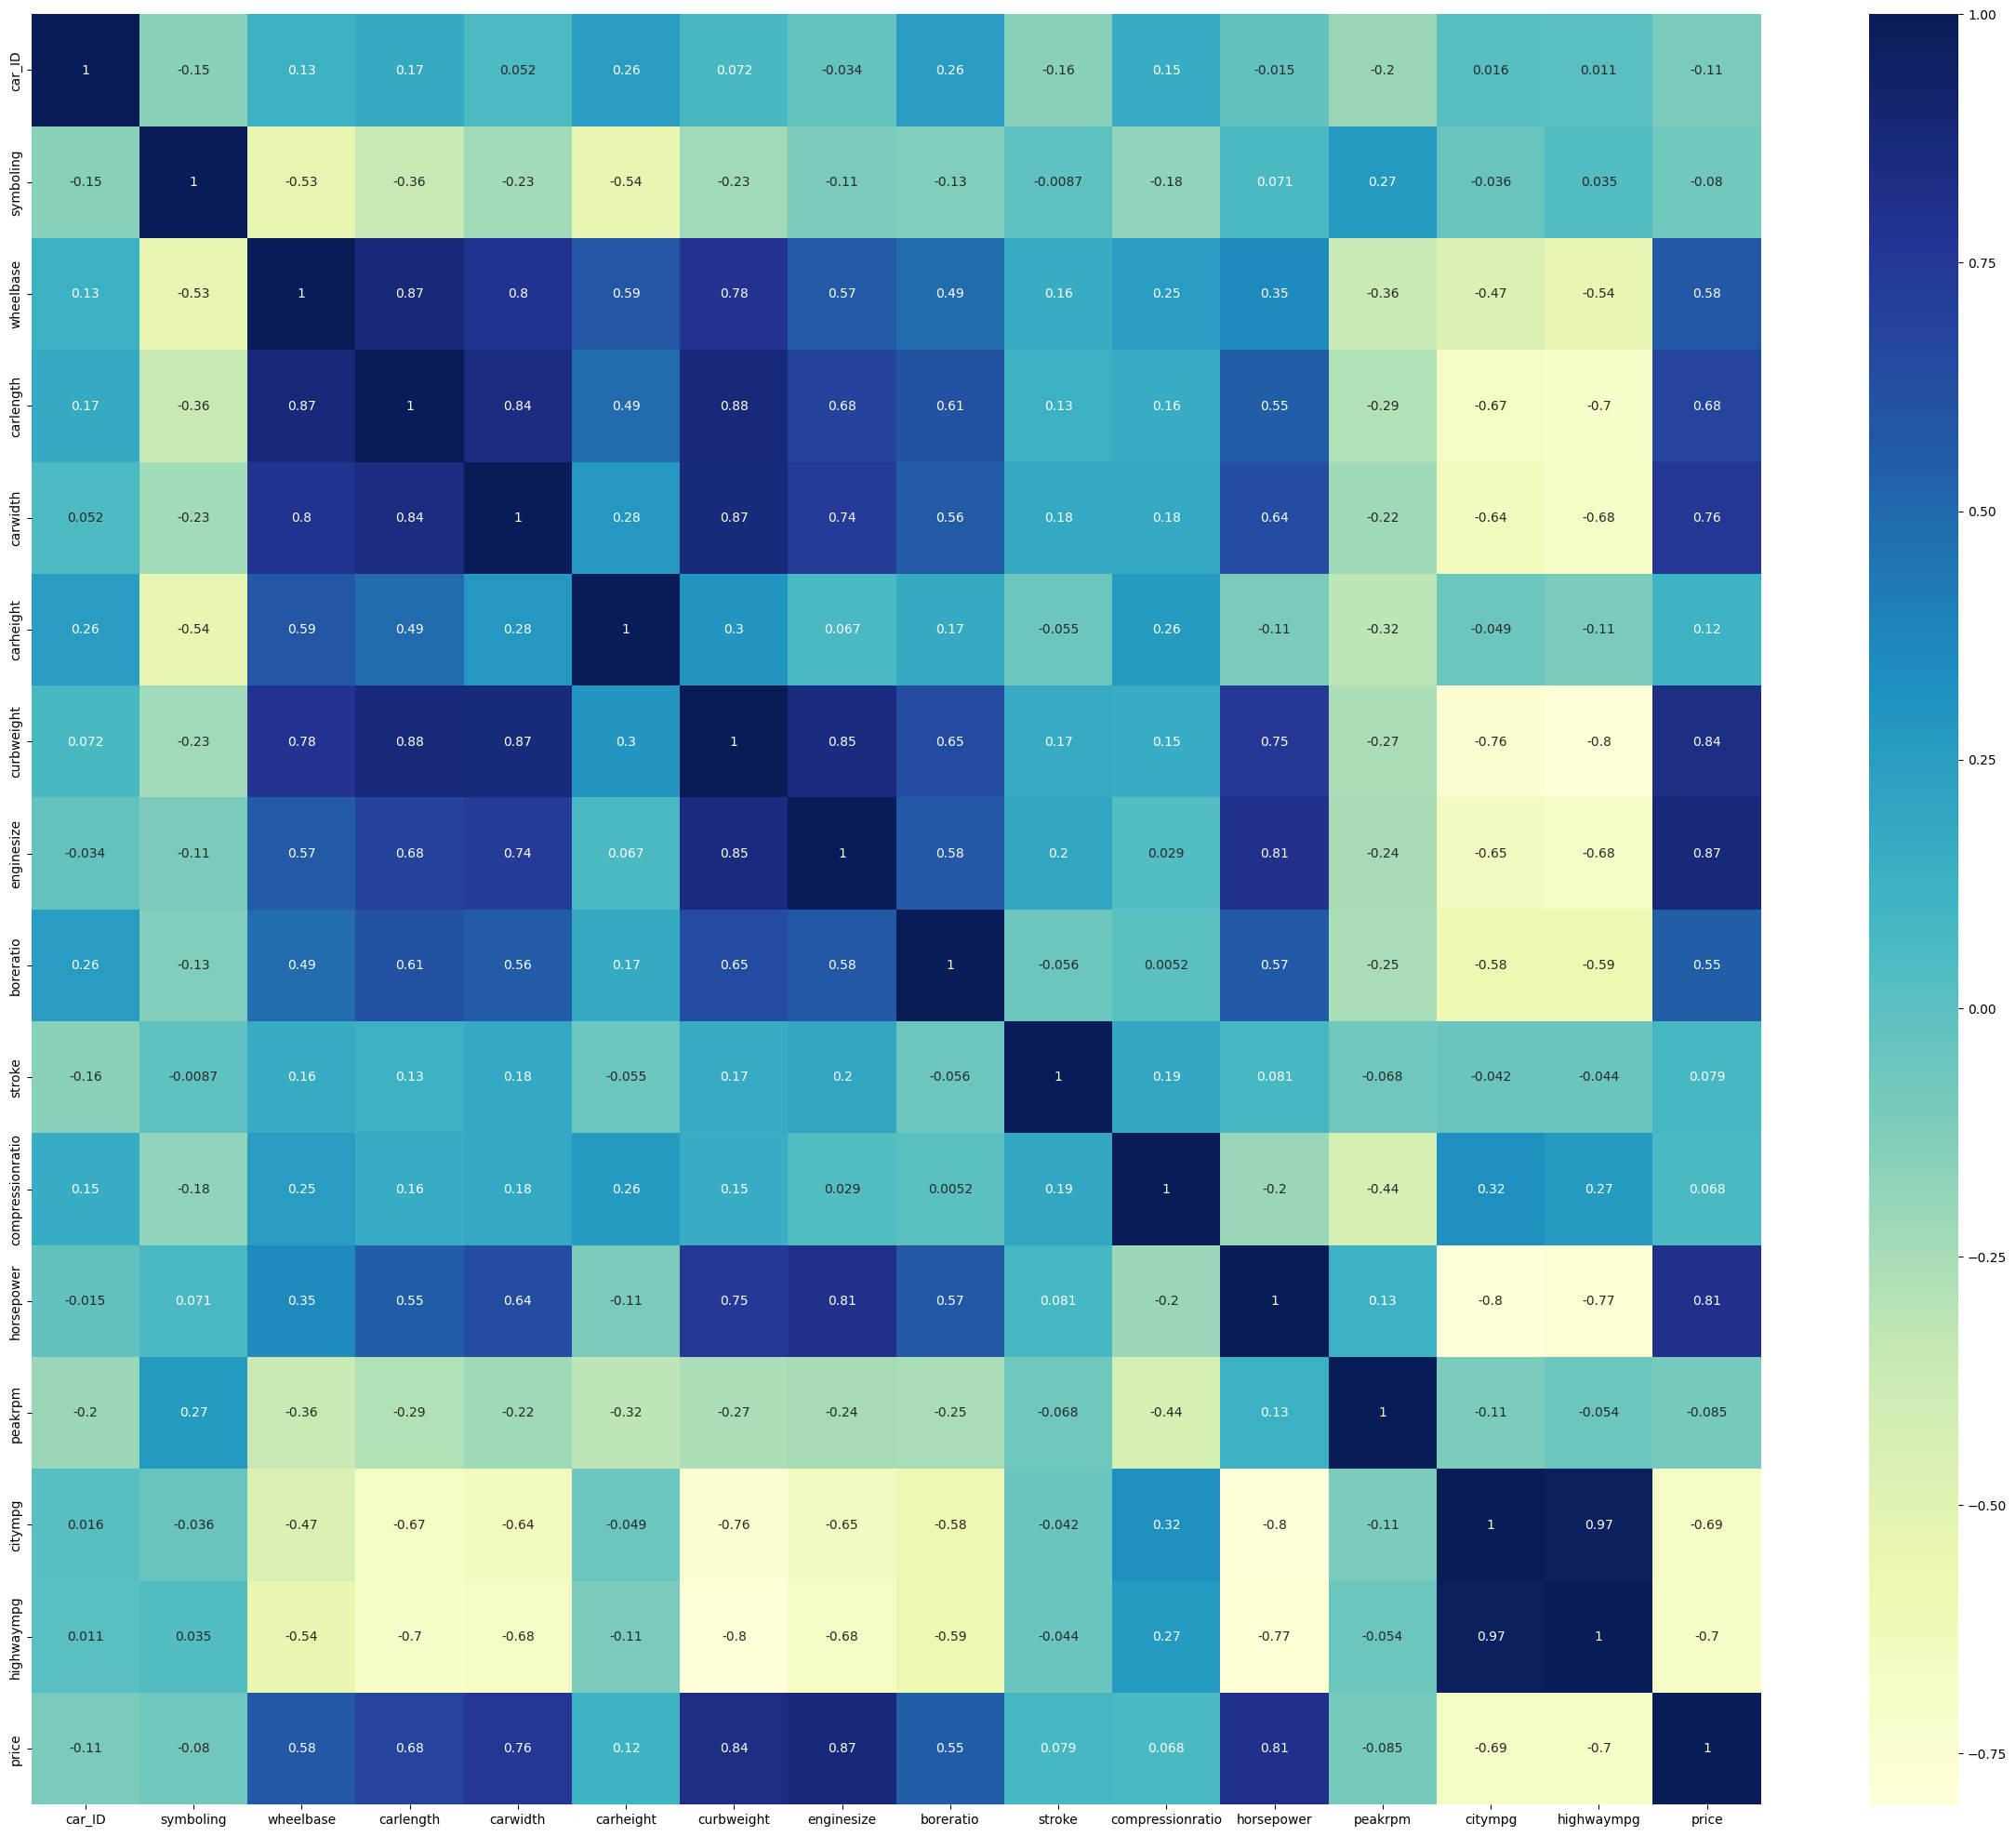

In [ ]:
plt.figure(figsize = (30, 25))
sp.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
x=df[['wheelbase','carlength',	'carwidth',	'enginesize','boreratio','horsepower']]
y=df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Using Split function to split the data into two parts ... the training model and testing model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)

print('Intercept:\n',regr.intercept_)
print('Coefficient:\n',regr.coef_)

Intercept:
 -56653.27668548017
Coefficient:
 [ 122.99269763  -19.92678617  696.49898732   90.28254037 -623.20425954
   56.25078033]


In [ ]:
price=(-56653.27668548017)+(122.99269763)*(88.6	)+(-19.92678617)*(168.8)+(696.49898732)*(64.1)+(90.28254037)*(130)+(-623.20425954)*(3.47)+(56.25078033)*(111)
print('Price:\n',price)
pred=regr.predict(x_test)
pred

Price:
 11343.867990380028


array([ 5925.65356168,  6272.85605433, 17810.7736389 , 32674.64243679,
        7225.58496975, 16004.13144569, 18727.47646278,  6272.85605433,
        7701.07993211,  6795.84851565,  7622.8570448 ,  6272.85605433,
        7724.91583491, 13662.97840954, 12885.95017416,  8219.78193567,
       17871.42266627, 31155.1883338 ,  6871.32052747,  6690.24646711,
        6144.8482095 , 11787.18838807, 11407.89631426, 18316.18835464,
       11899.47494974, 11449.52306318, 11800.91196756,  5925.65356168,
       17778.54467275,  6310.08563393, 10147.25891899,  6781.90968347,
       17778.54467275, 15178.15527972,  9937.64744696,  9463.53833454,
        7386.12045829, 29182.81491782, 23089.310174  ,  6494.68210038,
        8057.1001812 ])

In [ ]:
test_rmse =(np.sqrt(mean_squared_error(y_test,pred)))
test_r2= r2_score(y_test,pred)

print("test RMSE :",test_rmse)
print("r2 score :",test_r2)

test RMSE : 2641.2236245859895
r2 score : 0.8978832742896781


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


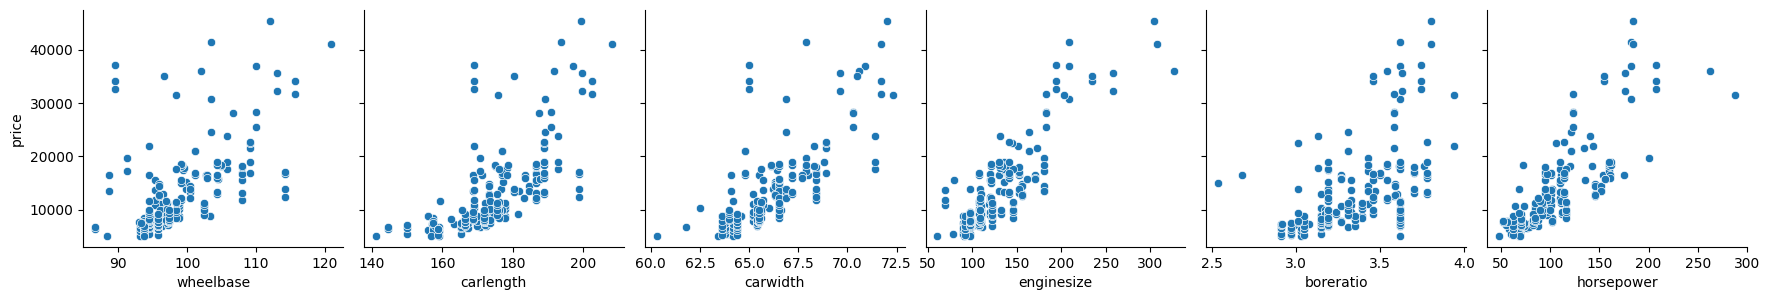

In [ ]:
pp = sp.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=['wheelbase','carlength',	'carwidth',	'enginesize','boreratio','horsepower'],size=3)